# Régression - California Housing
Ce notebook vise à prédire le prix médian des maisons en Californie à l'aide de modèles de régression.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Chargement des données
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Statistiques descriptives
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


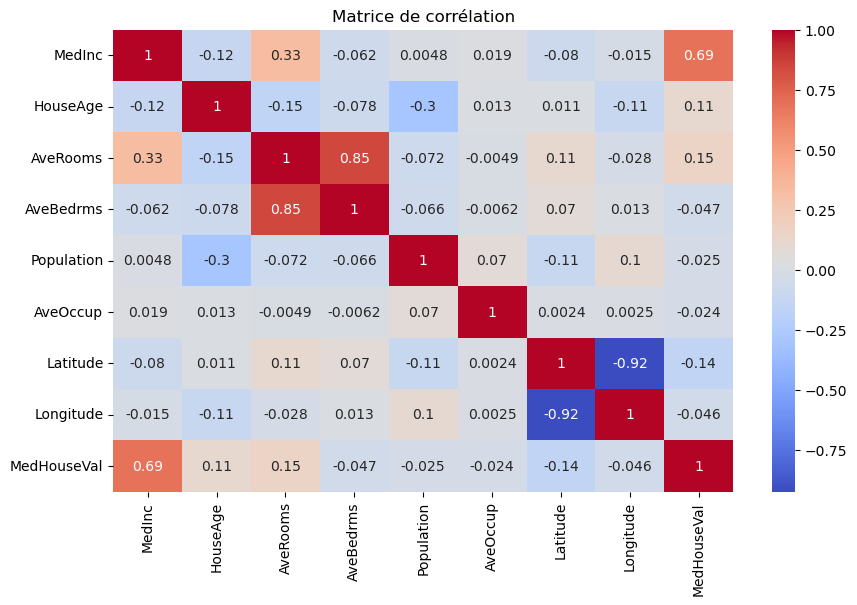

In [4]:
# Matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [5]:
# Séparation features/cible et standardisation
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [6]:
# Régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
print('Régression linéaire:')
print('MSE :', mean_squared_error(y_val, y_pred_val))
print('MAE :', mean_absolute_error(y_val, y_pred_val))
print('R²  :', r2_score(y_val, y_pred_val))

Régression linéaire:
MSE : 0.5297481095803488
MAE : 0.5333346447415038
R²  : 0.6142000785497264


In [7]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge R² :', r2_score(y_val, ridge.predict(X_val)))

# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print('Lasso R² :', r2_score(y_val, lasso.predict(X_val)))

Ridge R² : 0.6142131232059203
Lasso R² : 0.61314743598876


In [8]:
# Évaluation finale sur le test set
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
print('Test MSE :', mean_squared_error(y_test, y_test_pred))
print('Test MAE :', mean_absolute_error(y_test, y_test_pred))
print('Test R²  :', r2_score(y_test, y_test_pred))

Test MSE : 0.5617904958193358
Test MAE : 0.5333019589956596
Test R²  : 0.571286136505653


## Conclusion

La régression linéaire permet de modéliser efficacement le prix médian des maisons. Ridge et Lasso permettent d'ajuster la régularisation. D'autres modèles plus puissants (comme les forêts aléatoires ou le gradient boosting) pourraient être explorés pour de meilleures performances.